# 資料前處理

1. 資料型態轉換、符號修正
1. missing value、NA、empty
2. some cleaning
 




各變數名詞:
1. CO.GT.: CO濃度 mg/m^3
2. PT08.S1.CO: 氧化錫濃度
3. NMHC.GT: 非甲烷碳氫化合物
4. C6H6.GT: 苯 mg/m^3
5. PT08.S2.NMHC: 二氧化鈦
6. NOx.GT: 氮氧化物 ppb
7. PT08.S3.NOx: 氧化鎢
8. NO2GT: 二氧化氮
9. PT08.S4.NO2: 氧化鎢
10. PT08.S5.O3: 氧化銦
11. T: 溫度 C
12. RH: 相對濕度

13. AH: 絕對溼度

## 1. 資料型態轉換、符號修正

In [1]:
library(dplyr)
airquality <- read.csv("AirQualityUCI.csv",sep = ";")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
head(airquality, n= 50)

Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH,X,X.1
10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NA,NA
10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NA,NA
10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NA,NA
10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867",NA,NA
10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888",NA,NA
10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848",NA,NA
11/03/2004,00.00.00,"1,2",1185,31,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603",NA,NA
11/03/2004,01.00.00,1,1136,31,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702",NA,NA
11/03/2004,02.00.00,"0,9",1094,24,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648",NA,NA
11/03/2004,03.00.00,"0,6",1010,19,"1,7",561,-200,1705,-200,1235,501,"10,3","60,2","0,7517",NA,NA


In [3]:
# there are NA is 9358~9471 rows 
airquality[(9358:9471),] %>% is.na()

,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH,X,X.1
9358,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9359,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9360,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9361,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9362,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9363,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9364,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9365,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9366,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
9367,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE


In [4]:
airquality[(9358:9471),] == ""

,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH,X,X.1
9358,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9359,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9360,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9361,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9362,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9363,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9364,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9365,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9366,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA
9367,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,TRUE,TRUE,TRUE,NA,NA


由上表看到，此資料集在9358~9471rows中，資料不是存在NA，就是無資料，因此選擇將9358~9471rows的資料刪除<br>
以下的資料皆以1~9357rows資料做分析

In [5]:
# 以1~9357rows資料做分析
airquality <- airquality[1:9357,]

In [6]:
airquality$CO.GT. <- as.numeric(gsub("," ,".",airquality$CO.GT.))
airquality$C6H6.GT. <- as.numeric(gsub("," ,".",airquality$C6H6.GT.))
airquality$T <- as.numeric(gsub("," ,".",airquality$T))
airquality$RH <- as.numeric(gsub("," ,".",airquality$RH))
airquality$AH <- as.numeric(gsub("," ,".",airquality$AH))

In [7]:
time = seq(
  from = as.POSIXct("2004-3-10 18:00", tz = "UTC"),
  to = as.POSIXct("2005-4-4 14:00", tz = "UTC"),
  by = "hour"
)  

airquality$hour <- as.factor(format(time, "%H"))
airquality$year <- as.factor(format(time, "%Y"))
airquality$month <- as.factor(format(time, "%m"))
airquality$day <- as.factor(format(time, "%d"))
airquality$weekdays <- as.factor(format(time, "%w")) # 0 : Sunday

In [8]:
str(airquality)

'data.frame':	9357 obs. of  22 variables:
 $ Date         : Factor w/ 392 levels "","01/01/2005",..: 116 116 116 116 116 116 129 129 129 129 ...
 $ Time         : Factor w/ 25 levels "","00.00.00",..: 20 21 22 23 24 25 2 3 4 5 ...
 $ CO.GT.       : num  2.6 2 2.2 2.2 1.6 1.2 1.2 1 0.9 0.6 ...
 $ PT08.S1.CO.  : int  1360 1292 1402 1376 1272 1197 1185 1136 1094 1010 ...
 $ NMHC.GT.     : int  150 112 88 80 51 38 31 31 24 19 ...
 $ C6H6.GT.     : num  11.9 9.4 9 9.2 6.5 4.7 3.6 3.3 2.3 1.7 ...
 $ PT08.S2.NMHC.: int  1046 955 939 948 836 750 690 672 609 561 ...
 $ NOx.GT.      : int  166 103 131 172 131 89 62 62 45 -200 ...
 $ PT08.S3.NOx. : int  1056 1174 1140 1092 1205 1337 1462 1453 1579 1705 ...
 $ NO2.GT.      : int  113 92 114 122 116 96 77 76 60 -200 ...
 $ PT08.S4.NO2. : int  1692 1559 1555 1584 1490 1393 1333 1333 1276 1235 ...
 $ PT08.S5.O3.  : int  1268 972 1074 1203 1110 949 733 730 620 501 ...
 $ T            : num  13.6 13.3 11.9 11 11.2 11.2 11.3 10.7 10.7 10.3 ...
 $ RH    

## 2. missing value、NA、empty
現在來看看1~9357比中共有多少NA或無資料

In [9]:
NAnumber <- NULL
for (i in 3:length(colnames(airquality))) {
    NAnumber[colnames(airquality)[i]] <- sum(is.na(airquality[,i]))
}
NAnumber

Emptynumber <- NULL
for (i in 3:length(colnames(airquality))) {
    Emptynumber[colnames(airquality)[i]] <- sum((airquality[,i] == ""))
}
Emptynumber

CO.GT.   PT08.S1.CO.      NMHC.GT.      C6H6.GT. PT08.S2.NMHC. 
            0             0             0             0             0 
      NOx.GT.  PT08.S3.NOx.       NO2.GT.  PT08.S4.NO2.   PT08.S5.O3. 
            0             0             0             0             0 
            T            RH            AH             X           X.1 
            0             0             0          9357          9357 
         hour          year         month           day      weekdays 
            0             0             0             0             0

CO.GT.   PT08.S1.CO.      NMHC.GT.      C6H6.GT. PT08.S2.NMHC. 
            0             0             0             0             0 
      NOx.GT.  PT08.S3.NOx.       NO2.GT.  PT08.S4.NO2.   PT08.S5.O3. 
            0             0             0             0             0 
            T            RH            AH             X           X.1 
            0             0             0            NA            NA 
         hour          year         month           day      weekdays 
            0             0             0             0             0

由此看來X、X.1變數全部都是NA，代表此資料也完全無訊息<br>
而剩下的資料全都沒有NA值與empty，接下來的分析皆以1~9357筆資料中除去X、X.1來分析

In [10]:
# 不取變數X、X.1
airquality <- airquality[,-c(16,17)]

In [11]:
missing_same <- function(var1, var2) {
  
  if (sum(which(airquality[,var1] == -200)) < sum(which(airquality[,var2] == -200))) {
    n = which(airquality[,var1] == -200)[(which(airquality[,var1] == -200) %in% which(airquality[,var2] == -200))]
  }else {
    n = which(airquality[,var2] == -200)[(which(airquality[,var2] == -200) %in% which(airquality[,var1] == -200))]
  }
  return(length(n))
  #return(paste(colnames(airquality)[var1], "and", colnames(airquality)[var2], "both have missing data in", c(n), sep = " "))
  
}

NumberOfMissing = data.frame()
for (i in 3:(length(colnames(airquality))-5)) {
  for (j in 3:(length(colnames(airquality))-5)) {
    NumberOfMissing[i-2,colnames(airquality)[j]] <- missing_same(var1 = i, var2 = j)
  }
}
rownames(NumberOfMissing) <- colnames(airquality)[3:(length(colnames(airquality))-5)]
NumberOfMissing



,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
CO.GT.,1683,36,1659,36,36,1226,36,1226,36,36,36,36,36
PT08.S1.CO.,36,366,339,366,366,44,366,44,366,366,366,366,366
NMHC.GT.,1659,339,8443,339,339,1602,339,1605,339,339,339,339,339
C6H6.GT.,36,366,339,366,366,44,366,44,366,366,366,366,366
PT08.S2.NMHC.,36,366,339,366,366,44,366,44,366,366,366,366,366
NOx.GT.,1226,44,1602,44,44,1639,44,1639,44,44,44,44,44
PT08.S3.NOx.,36,366,339,366,366,44,366,44,366,366,366,366,366
NO2.GT.,1226,44,1605,44,44,1639,44,1642,44,44,44,44,44
PT08.S4.NO2.,36,366,339,366,366,44,366,44,366,366,366,366,366
PT08.S5.O3.,36,366,339,366,366,44,366,44,366,366,366,366,366


 由此表可知，以對角線來看 CO.GT.、NMHC.GT.、NOx.GT、NO2.GT.有超過1000筆missing data，剩下的變數皆有366筆missing data；以非對角線來看，CO.GT.、NMHC.GT.、NOx.GT、NO2.GT.變數中 missing data出現的位置相同的共有皆超過一千筆以上，但並非全部都missing data皆出現在相同位置，而剩下的變數中missing data皆為366筆，且其出現的位置皆相等!!


In [12]:
Total_missing = NumberOfMissing %>% as.matrix %>% diag()

In [13]:
numberofmissing <- NULL
for (i in 1:length(Total_missing)) {
    numberofmissing<-  rbind(numberofmissing,NumberOfMissing[i,]/Total_missing[i])
}
numberofmissing

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
CO.GT.,1.00000000,0.02139037,0.9857398,0.02139037,0.02139037,0.7284611,0.02139037,0.7284611,0.02139037,0.02139037,0.02139037,0.02139037,0.02139037
PT08.S1.CO.,0.09836066,1.00000000,0.9262295,1.00000000,1.00000000,0.1202186,1.00000000,0.1202186,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000
NMHC.GT.,0.19649414,0.04015160,1.0000000,0.04015160,0.04015160,0.1897430,0.04015160,0.1900983,0.04015160,0.04015160,0.04015160,0.04015160,0.04015160
C6H6.GT.,0.09836066,1.00000000,0.9262295,1.00000000,1.00000000,0.1202186,1.00000000,0.1202186,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000
PT08.S2.NMHC.,0.09836066,1.00000000,0.9262295,1.00000000,1.00000000,0.1202186,1.00000000,0.1202186,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000
NOx.GT.,0.74801708,0.02684564,0.9774253,0.02684564,0.02684564,1.0000000,0.02684564,1.0000000,0.02684564,0.02684564,0.02684564,0.02684564,0.02684564
PT08.S3.NOx.,0.09836066,1.00000000,0.9262295,1.00000000,1.00000000,0.1202186,1.00000000,0.1202186,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000
NO2.GT.,0.74665043,0.02679659,0.9774665,0.02679659,0.02679659,0.9981730,0.02679659,1.0000000,0.02679659,0.02679659,0.02679659,0.02679659,0.02679659
PT08.S4.NO2.,0.09836066,1.00000000,0.9262295,1.00000000,1.00000000,0.1202186,1.00000000,0.1202186,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000
PT08.S5.O3.,0.09836066,1.00000000,0.9262295,1.00000000,1.00000000,0.1202186,1.00000000,0.1202186,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000


若將上表改為比例來看，可以看到某一變數的missing data 與另一變數的missing data出現位置相同佔的比例，因此此表並不會對稱<br>
CO.GT.、NMHC.GT.、NOx.GT、NO2.GT.變數兩兩的比例佔比皆很高，其中NMHC.GT.個數較大，所以其比例會較低，但是其與CO.GT.、NOx.GT、NO2.GT.變數的比例相較於剩下的變數的比例是比較高的。

# 目前的發現:
- 9358~9471筆資料皆為NA或empty，因此將這段區間刪除
- 變數X、X.1 也都是NA，此變數無法給我們資訊，因此也可以把它刪除
- 各變數中皆有NA，CO.GT.、NMHC.GT.、NOx.GT、NO2.GT.變數含有的NA個數超過上千，剩下的變數含有的NA個數皆為366筆，且其NA出現的位置(也就是說出現NA的時間)皆相同，且仔細看其發生時間有些為連續六小時或連續兩三天，可能發生這種情況的原因猜測為當時儀器故障維修、數值太低無法偵測，就目前資訊無法確定其發生原因。
- CO.GT.、NMHC.GT.、NOx.GT、NO2.GT.變數兩兩重複出現NA的位置(亦即時間)的比例相對於其他變數的比例較高


In [14]:
# transfer Date and Time to Date type
# 1~9357筆資料的時間為2004/03/10 18:00至2005/04/04 14:00
time = seq(
  from = as.POSIXct("2004-3-10 18:00", tz = "UTC"),
  to = as.POSIXct("2005-4-4 14:00", tz = "UTC"),
  by = "hour"
)  


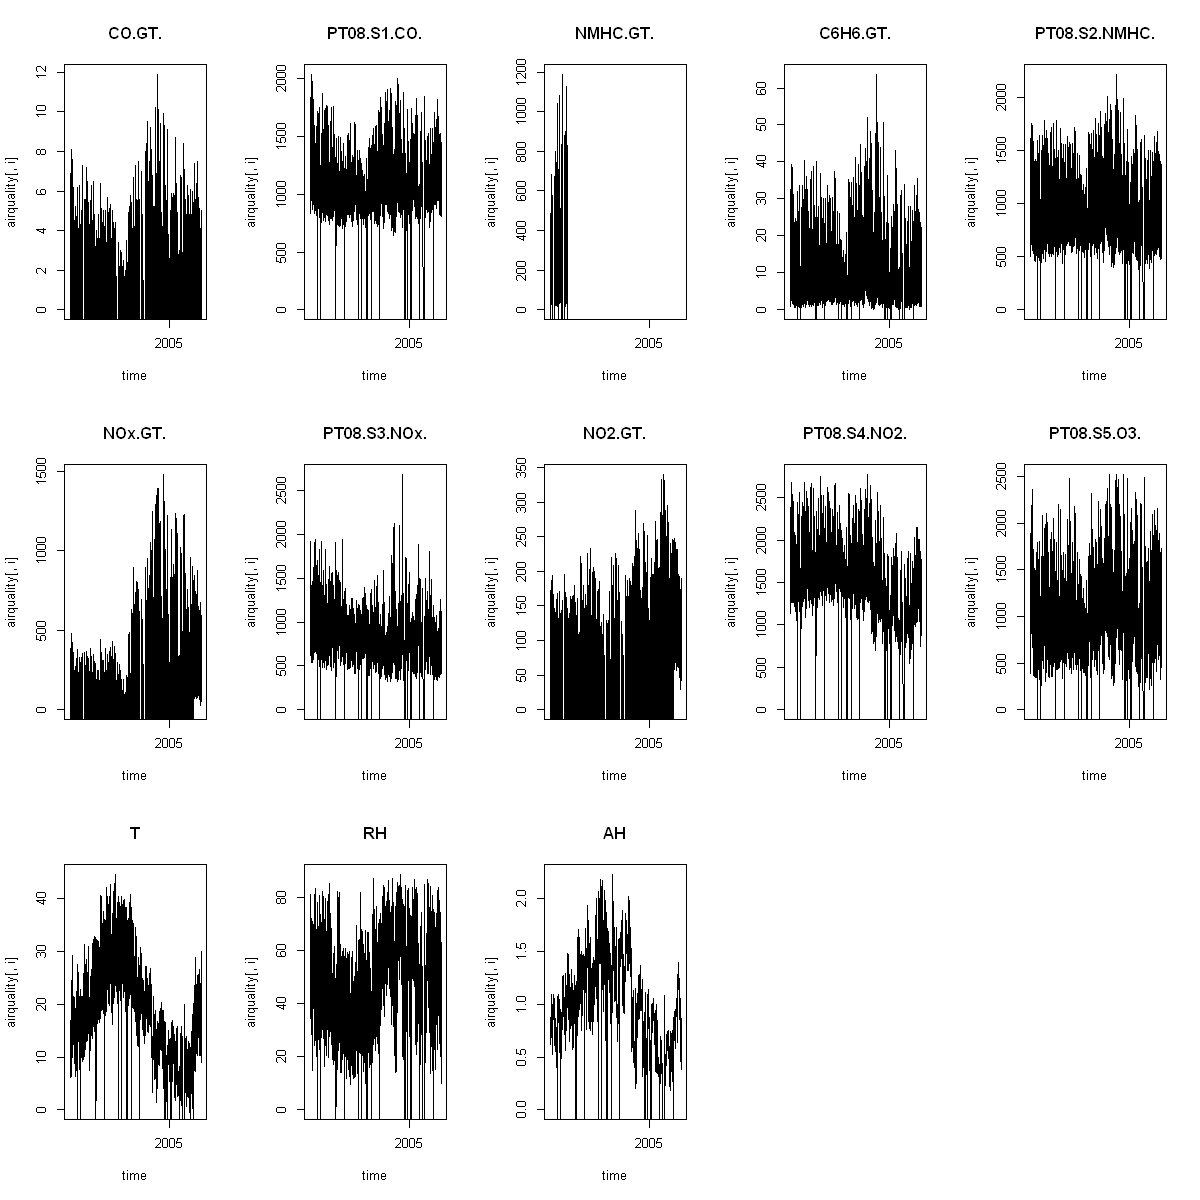

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(3,5))
for (i in 3:15) {
    plot( x =time, y = airquality[,i],type = 'l',ylim = c(0,max(airquality[,i])),main = colnames(airquality)[i])
}

- 由上圖看到NMHC.GT.變數大部分的資料都缺失，這部分對於資料分析有困難，因為缺失比例太大，無法使用填補，因此決定將此變數刪除
- NOx.GT.、NO2.GT.看起來有隨著時間而改變趨勢
- T、RH、AH看起來有個週期
- 其餘變數看起來是穩定的


## 3. Filling missing data

這裡想依照missing data 的前幾期資訊平均來進行填補，而期數的選擇可以以pacf來觀察或者以auto.arima函數索地的期數來選擇

In [16]:
library(forecast)

airquality <- airquality[,-5] # 刪除 NMHC.GT. 變數

In [17]:
arma = NULL
for (i in 3:14) {
    var = airquality[,i]
    model = auto.arima(var)
    arma <- rbind(arma,model$arma)
}

rownames(arma) <- colnames(airquality)[3:14]

In [18]:
arma <- arma[,c(1,2,5)]
colnames(arma) <- c("p","q","d")

In [19]:
arma

,p,q,d
CO.GT.,4,1,1
PT08.S1.CO.,2,5,1
C6H6.GT.,1,1,1
PT08.S2.NMHC.,2,2,1
NOx.GT.,5,3,1
PT08.S3.NOx.,5,2,1
NO2.GT.,3,1,1
PT08.S4.NO2.,2,2,1
PT08.S5.O3.,4,1,1
T,1,1,1


In [20]:
# 用來填補-200 的值，在此我以前arma的前p期資料的平均作為替換
fill_missingdata <- function(x,p) {
        for (i in 1:length(x)) {
        if (x[i] == -200) {
            data = NULL
            for(j in 1:p) {
                data <- c(data,x[i-j])
            }
            options(digits = 1)
            x[i] <- mean(data)
        }else {
            x[i] <-x[i]
        }    
    }
    return(x)
}

In [21]:
# 對 'CO.GT.' 'PT08.S1.CO.' 'C6H6.GT.' 'PT08.S2.NMHC.' 'NOx.GT.' 'PT08.S3.NOx.' 'NO2.GT.' 'PT08.S4.NO2.' 'PT08.S5.O3.' 'T' 'RH' 'AH' 填補
# 並以auto.arima函數算得的p值作為依據，以前p期平均來取代
for (i in 3:14) {
    assign(colnames(airquality)[i], fill_missingdata(airquality[,i],arma[i-2,"p"])) 
}


In [22]:
# 新增一個資料為已將 -200 改為前p其資料平均， 並且加入 hour、weekdays、month1變數以利後續分析
Airquality <- NULL
for (i in 3:14) {
  Airquality <- cbind(Airquality, get(colnames(airquality)[i]))  
}
Airquality <- cbind(Airquality, airquality$hour, airquality$weekdays, airquality$month)
colnames(Airquality) <- c(colnames(airquality)[3:14], "hour", "weekdays", "month")
Airquality <- as.data.frame(Airquality)
Airquality$hour <- as.factor(Airquality$hour)
Airquality$weekdays <- as.factor(Airquality$weekdays)
Airquality$month <- as.factor(Airquality$month)
head(Airquality,n = 50)

CO.GT.,PT08.S1.CO.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH,hour,weekdays,month
2.6,1360,12,1046,166,1056,113,1692,1268,14,49,0.8,19,4,3
2.0,1292,9,955,103,1174,92,1559,972,13,48,0.7,20,4,3
2.2,1402,9,939,131,1140,114,1555,1074,12,54,0.8,21,4,3
2.2,1376,9,948,172,1092,122,1584,1203,11,60,0.8,22,4,3
1.6,1272,6,836,131,1205,116,1490,1110,11,60,0.8,23,4,3
1.2,1197,5,750,89,1337,96,1393,949,11,59,0.8,24,4,3
1.2,1185,4,690,62,1462,77,1333,733,11,57,0.8,1,5,3
1.0,1136,3,672,62,1453,76,1333,730,11,60,0.8,2,5,3
0.9,1094,2,609,45,1579,60,1276,620,11,60,0.8,3,5,3
0.6,1010,2,561,78,1705,71,1235,501,10,60,0.8,4,5,3


# EDA 

首先對各個變數經填補後的分布與其時間序列的分布，並且在此處會多加探討在不同月份、星期、小時各變數的總量情況
1. 變數分布
2. 各變數在小時、星期、月份的趨勢
3. 相關性


## 1. 各變數的分布

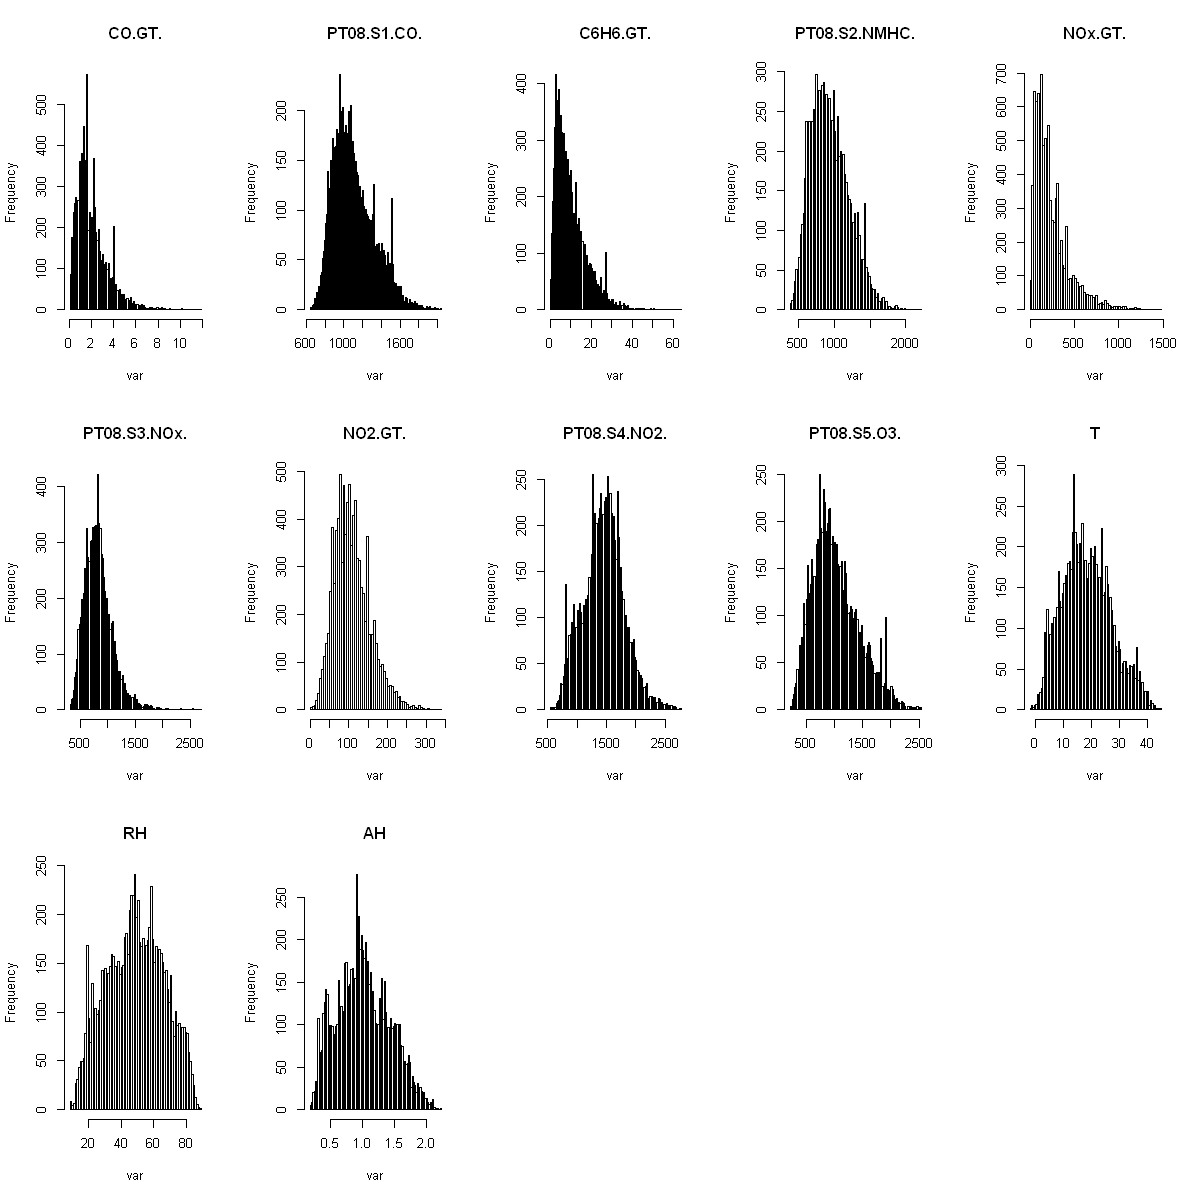

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(3,5))
for (i in 1:12) {
    var = Airquality[,i]
    #var = get(colnames(airquality)[i+2])
    hist(var,breaks = 100,main = colnames(Airquality)[i])
}

ERROR: Error in hist.default(var, breaks = nclass.Sturges(var), main = colnames(airquality)[i]): 'x' must be numeric


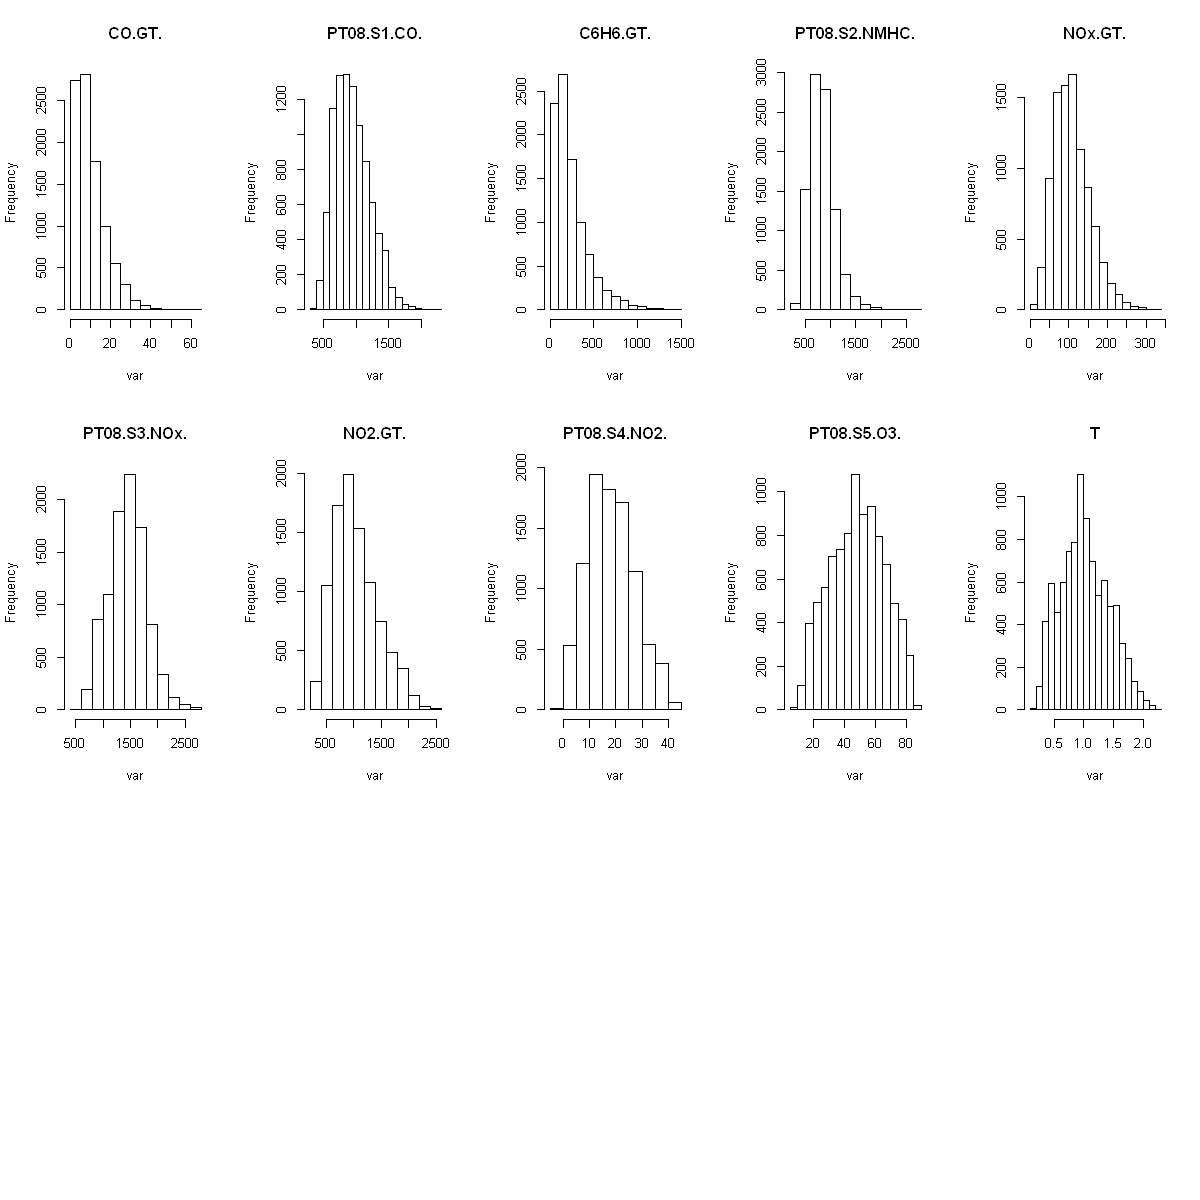

In [24]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(3,5))
for (i in 3:14) {
    var = Airquality[,i]
    #var = get(colnames(airquality)[i])
    hist(var,breaks = nclass.Sturges(var),main = colnames(airquality)[i])
}

- 此兩張圖選擇不同的breaks來看，上面那張圖用breaks = 1000，下方則nclass.Sturges函數根據數值範圍來選擇breaks
- 以break = 100 的長條圖來看，某些變數在某些值的個數有突然增加情況
- CO.GT.、C6H6、PT08.S2.NMHC.、NOx.GT.、PT08.S3.NOx.、NO2.GT.、PT08.S4.NO2.、PT08.S5.O3.皆稍有右偏的情形，之後分析可以對其取logrithm，使其分布更像常態分配
- RH、AH 以breaks = 100時稍微接近鐘型分布


## 2. 各變數在hour、weekdays、month的變化

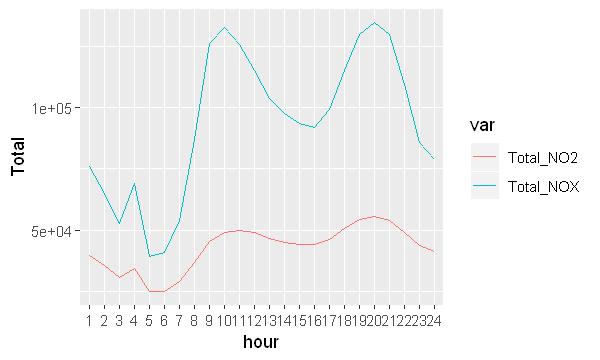

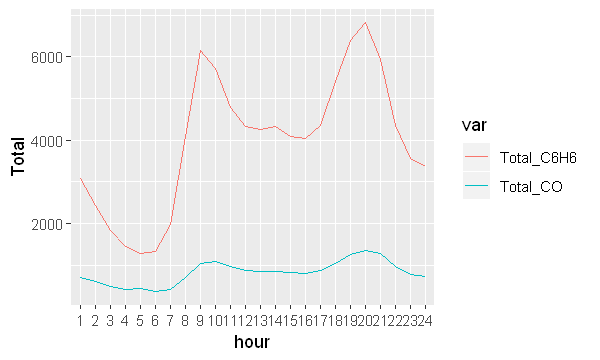

In [25]:
library(ggplot2)
library(tidyr)
library(dplyr)
Total = Airquality %>% group_by(hour) %>% summarise(Total_NOX = sum(NOx.GT.),Total_NO2 = sum(NO2.GT.))
options(repr.plot.width = 5, repr.plot.height = 3)
Total = gather(Total, key = "var",value = "Total", -hour)
#Total
ggplot(data = Total,aes(x = hour, y = Total, group = var,colour = var)) + 
    geom_line()

Total = Airquality %>% group_by(hour) %>% summarise(Total_CO = sum(CO.GT.),Total_C6H6 = sum(C6H6.GT.))
options(repr.plot.width = 5, repr.plot.height = 3)
Total = gather(Total, key = "var",value = "Total", -hour)
#Total
ggplot(data = Total,aes(x = hour, y = Total, group = var,colour = var)) + 
    geom_line()

- 由上圖看到 NOX、NO2 在一天內的數量高低起伏情況相似，唯其數量不同
- NOX在清晨過後有上升的趨勢，在10點達到高峰，下午4、5點也開始有上升的趨勢，到晚上8點達到高峰，由此看來似乎跟人類的作息相關，上下班時間NOX的含量即上升


-  C6H6在清晨過後有上升的趨勢，在10點達到高峰，下午4、5點也開始有上升的趨勢，到晚上8點達到高峰，似乎跟人類的作息相關，上下班時間C6H6的含量即上升
- CO的含量趨勢與C6H6相似，在清晨6點、15點處在低點，在10點、20點達到高峰
- 從此圖看到含量的走勢隨著人類通勤時間蠻有相關，因此後續可以考慮將此變數加入模型裡

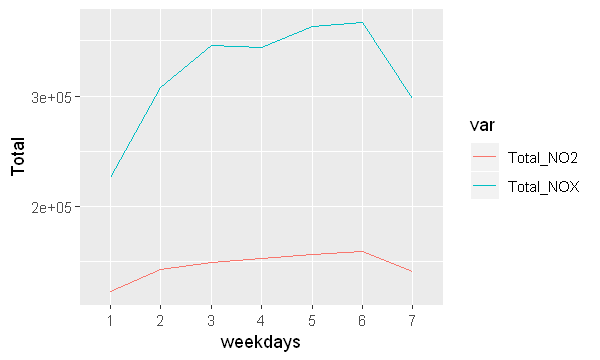

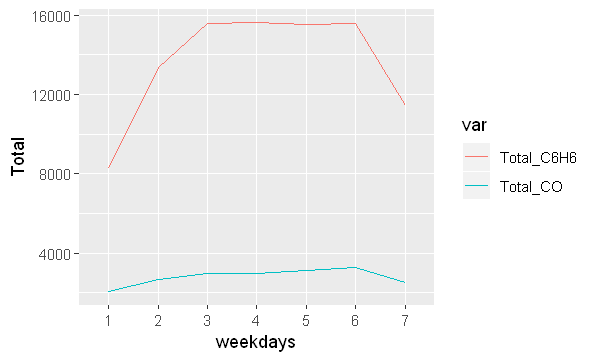

In [26]:
Total = Airquality %>% group_by(weekdays) %>% summarise(Total_NOX = sum(NOx.GT.),Total_NO2 = sum(NO2.GT.))
options(repr.plot.width = 5, repr.plot.height = 3)
Total = gather(Total, key = "var",value = "Total", -weekdays)
#Total
ggplot(data = Total,aes(x = weekdays, y = Total, group = var,colour = var)) + 
    geom_line()

Total = Airquality %>% group_by(weekdays) %>% summarise(Total_CO = sum(CO.GT.), Total_C6H6 = sum(C6H6.GT.))
options(repr.plot.width = 5, repr.plot.height = 3)
Total = gather(Total, key = "var",value = "Total", -weekdays)
#Total
ggplot(data = Total,aes(x = weekdays, y = Total, group = var,colour = var)) + 
    geom_line()

- NO2、NOX在星期一為最低點，由此開始爬升在星期六達到最高峰
- NO2、NOX的含量對於星期的變數由此圖來看可能有影響

- C6H6、CO 皆是在星期一為最低點，且由此開始有上升的趨勢，C6H6在星期三至星期六的區別並不大
- 由此圖看來星期的變數對於C6H6、CO也是有影響的，後續在做預測時的模型可以考慮加進此變數

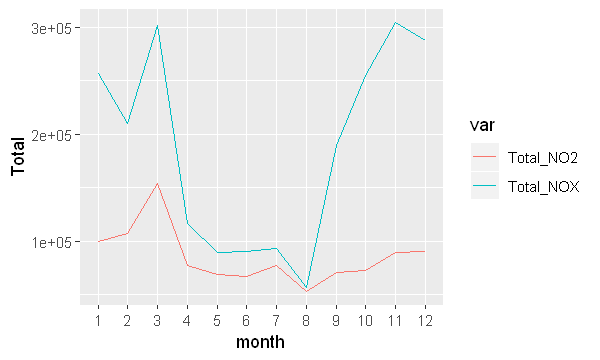

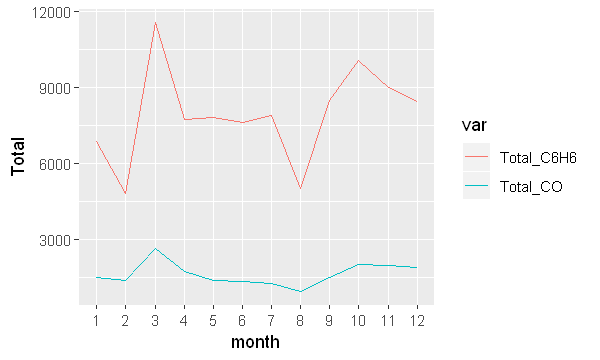

In [27]:
Total = Airquality %>% group_by(month) %>% summarise(Total_NOX = sum(NOx.GT.),Total_NO2 = sum(NO2.GT.))
options(repr.plot.width = 5, repr.plot.height = 3)
Total = gather(Total, key = "var",value = "Total", -month)
#Total
ggplot(data = Total,aes(x = month, y = Total, group = var,colour = var)) + 
    geom_line()

Total = Airquality %>% group_by(month) %>% summarise(Total_CO = sum(CO.GT.), Total_C6H6 = sum(C6H6.GT.))
options(repr.plot.width = 5, repr.plot.height = 3)
Total = gather(Total, key = "var",value = "Total", -month)
#Total
ggplot(data = Total,aes(x = month, y = Total, group = var,colour = var)) + 
    geom_line()

- 由此圖看到從八月開始NO2、NOX的含量極開始飆升，而在春、夏季含量則明顯下降，稍微奇怪的是NOX在十二月~二月竟然有下降的趨勢，而在三月又回高峰
- 在八月的NOX與NO2的含量相差不大，代表其它非NO2的氮氧化物含量減少了!
- C6H6從八月開始含量開始上升，十月~二月有下降的趨勢，三月又回到高峰 
- CO在不同月份其實相差不大，僅在三月、十月稍高，八月稍低
- 月份對於此四種成分含量看來也有影響，在此可以考慮在後續的模型裡加入此變數

## 3. 相關性


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



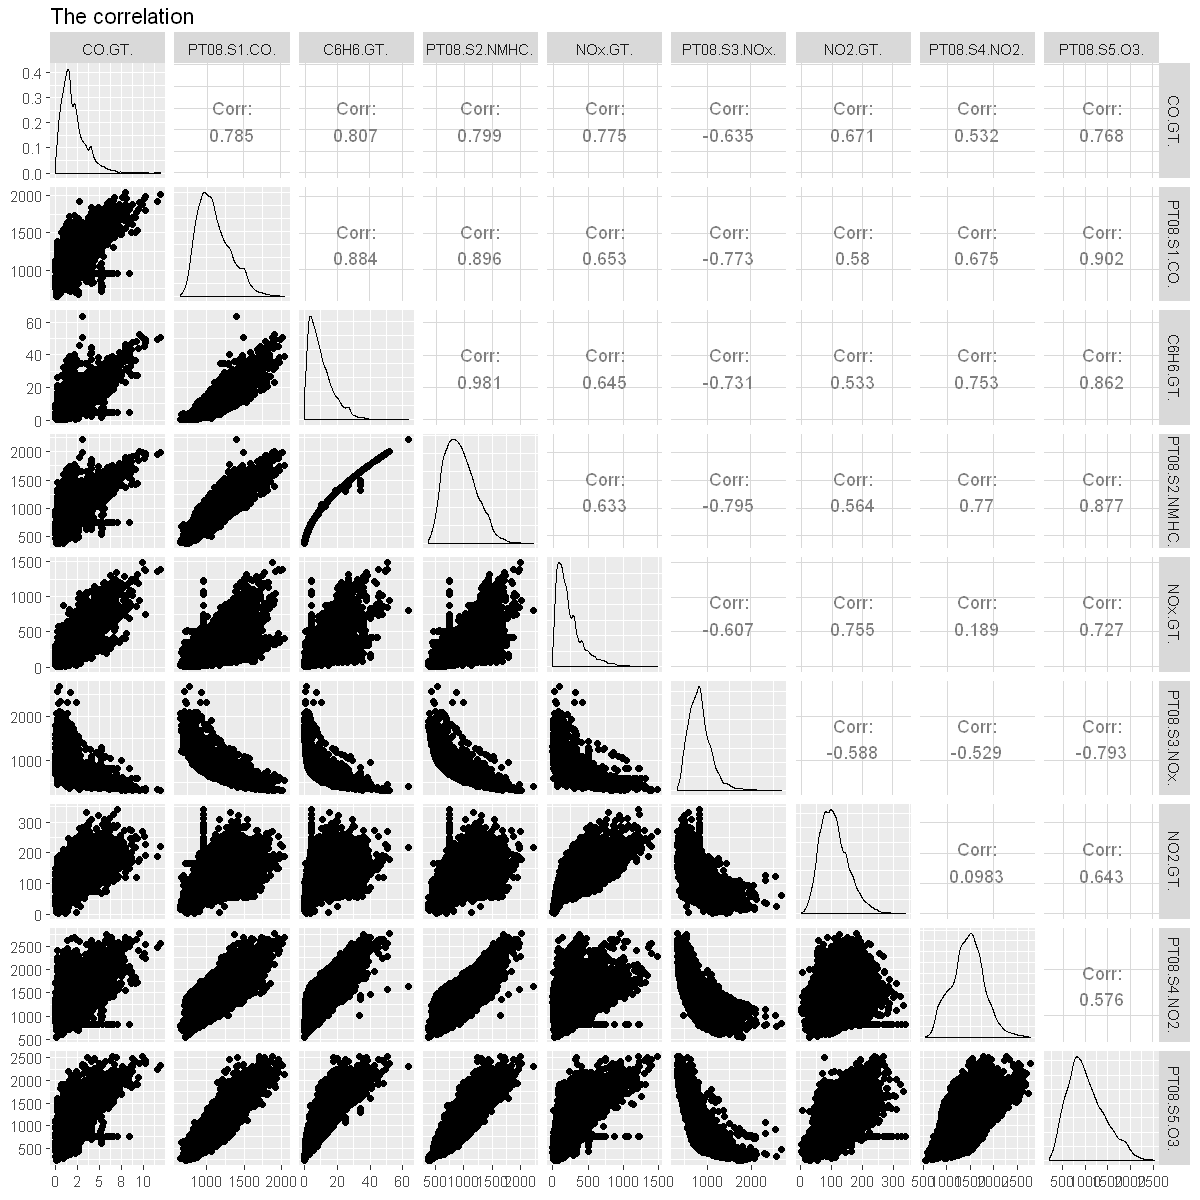

In [28]:
library(GGally)
options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(Airquality[],columns = 1:9, title = "The correlation", axisLabels = "show", columnLabels = colnames(Airquality)[1:9])

- 先看對角線， 對角線的圖代表該變數的分布，由此看到每幾乎每個變數都有呈現右偏，因此後續需要取log，以便回歸分析
- 其中看到C6H6與PT08.S2.NMHC.相關性相當高!
- PT08.S3.NOx與其他變數皆呈現負相關
- NO2.GT.與PT08.S4.NO2的相關性僅0.09；NOx.GT.與PT08.S4.NO2的相關性僅0.189


# Define air quality

空氣品質指數(AQI)，基於24小時平均濃度計算AIQ，當數值越大代表空氣污染狀況越嚴重對人體的健康危害越大。在看AQI也必須同時兼顧即時濃度數據，因此亦有及時空氣品質指數，即時空氣品質指數為採用汙染物當前1小時平均濃度。<br/><br/>

國際對於空氣品質分指數採用的物質有細顆粒物($PM_{2.5}$)、可吸入顆粒物($PM_{10}$)、二氧化硫($SO_2$)、二氧化氮($NO_2$)、臭氧($O_3$)、一氧化碳($CO$)，其中臭氧($O_3$)需提供一小時內平均濃度與八小時內平均濃度，一氧化碳($CO$)須提供八小時內平均濃度，二氧化硫($SO_2$)、二氧化氮($NO_2$)須提供一小時內平均濃度，細顆粒物($PM_{2.5}$)、可吸入顆粒物($PM_{10}$)須提供24時內平均濃度。<br/><br/>

由此看到對於二氧化氮($NO_2$)與二氧化硫($SO_2$)有即時數據需求，在此我以二氧化氮作為我的空氣品質檢測目標，因此以下以二氧化氮的預測為目的。而可以考慮的變數除了小時、星期、月份、溫度、相對溼度、絕對溼度以外，主要的變數還有'CO.GT.' 'PT08.S1.CO.' 'C6H6.GT.' 'PT08.S2.NMHC.' 'NOx.GT.' 'PT08.S3.NOx.' 'PT08.S5.O3.' 'T' 'RH' 'AH' ， 其中'PT08.S4.NO2.'不考慮的原因為其與NO2的相關性低，因此不考慮。

In [29]:
# 將後五天的資料設為test set ，剩下的設為train set
train_Airquality <- slice(Airquality, 1:9237)
test_Airquality <- slice(Airquality, 9238:9357)

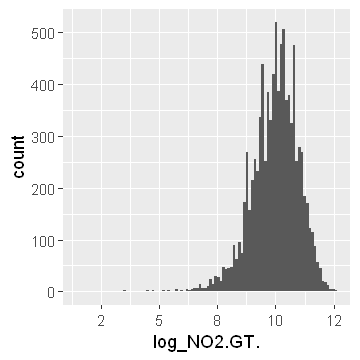

In [30]:
# 因為NO2有右偏的情況，在此先將之取log

train_Airquality$log_NO2.GT. <- log(train_Airquality$NO2.GT.)
log_NO2_sd <- (train_Airquality$log_NO2.GT. %>% sd())
train_Airquality$log_NO2.GT. <- log(train_Airquality$NO2.GT.)/log_NO2_sd

options(repr.plot.width = 3, repr.plot.height = 3)
ggplot(data = train_Airquality, aes(x = log_NO2.GT.)) + geom_histogram(bins = 100)


# Model 
1. Base model
2. Lag model
3. Jaems-Stein model

## 1. Base model
首先先建立一個最基礎的模型，我將各變數接考慮進去建立一個回歸模型

In [31]:
base_lm_model = lm(log_NO2.GT.~ CO.GT.+ PT08.S1.CO. + C6H6.GT. + PT08.S2.NMHC. + NOx.GT. + PT08.S3.NOx. + PT08.S5.O3. + T + AH + RH + hour + weekdays + month, 
  data = train_Airquality)
base_lm_model


Call:
lm(formula = log_NO2.GT. ~ CO.GT. + PT08.S1.CO. + C6H6.GT. + 
    PT08.S2.NMHC. + NOx.GT. + PT08.S3.NOx. + PT08.S5.O3. + T + 
    AH + RH + hour + weekdays + month, data = train_Airquality)

Coefficients:
  (Intercept)         CO.GT.    PT08.S1.CO.       C6H6.GT.  PT08.S2.NMHC.  
     8.91e+00       1.50e-01       8.37e-05      -1.16e-01       2.93e-03  
      NOx.GT.   PT08.S3.NOx.    PT08.S5.O3.              T             AH  
     1.49e-03      -9.29e-04       1.92e-04       4.34e-03      -6.72e-01  
           RH          hour2          hour3          hour4          hour5  
    -2.10e-03      -9.22e-02      -2.27e-01       2.19e-01      -4.40e-01  
        hour6          hour7          hour8          hour9         hour10  
    -3.59e-01      -2.49e-01      -1.38e-01      -7.30e-02      -3.18e-02  
       hour11         hour12         hour13         hour14         hour15  
     6.06e-02       8.87e-02       5.01e-02      -1.07e-02      -3.47e-02  
       hour16         hour17

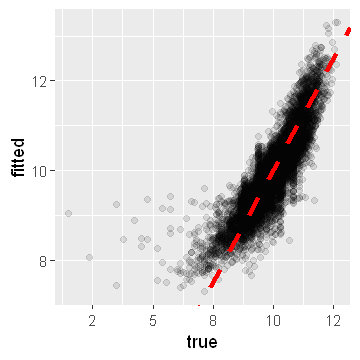

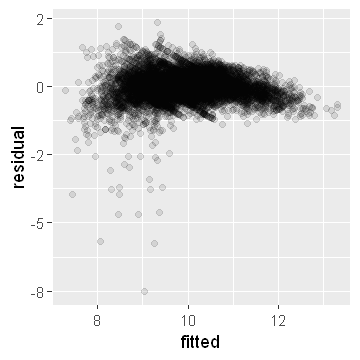

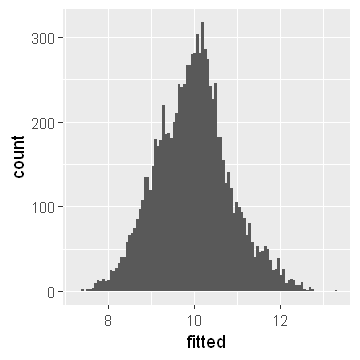

In [32]:
options(repr.plot.width = 3, repr.plot.height = 3)

data = data.frame(true = train_Airquality$log_NO2.GT, fitted = base_lm_model$fitted.values,residual = base_lm_model$residuals)
ggplot(data = data, aes(x = true, y = fitted), main = "fitted value v.s. true value") + geom_point(alpha = 0.1) + geom_abline(intercept = 0, slope = 1, color="red", 
                 linetype="dashed", size=1.5)
#plot(train_Airquality$log_NO2.GT.,base_lm_model$fitted.values, main = "fitted value v.s. true value")
ggplot(data = data, aes(x = fitted, y = residual), main = "fitted value v.s. redisual") + geom_point(alpha = 0.1)
ggplot(data = data, aes(x = fitted)) + geom_histogram(bins = 100)
#hist(base_lm_model$residuals, breaks = 100, main = "The histogram of residual")

In [33]:
# check normality
ks.test(base_lm_model$residuals, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  base_lm_model$residuals
D = 0.2, p-value <2e-16
alternative hypothesis: two-sided


In [34]:
library(forecast)
lbd = BoxCox.lambda(train_Airquality$NO2.GT.)
# 經Box-Cox 轉換後的NO2 仍然不服從常態分配
ks.test(BoxCox(train_Airquality$NO2.GT., lambda = lbd),"pnorm")


Warning message in ks.test(BoxCox(train_Airquality$NO2.GT., lambda = lbd), "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  BoxCox(train_Airquality$NO2.GT., lambda = lbd)
D = 1, p-value <2e-16
alternative hypothesis: two-sided


- 由上圖看到，有部分點的發生其真實值較小但預測值較大的情況，如果要改善此模型的準確度，必須對這些較離散的資料作分析，進一步將影響此離散值的因素考慮進來<br/>
- 而其殘差的長條圖看起來也有點像鐘型分配，是否服從常態分配仍需透過檢定確定。
- 最後檢查殘差並不服從服從常態分配
- 再回去從頭將NO2 取Box-Cox轉換後並檢定常態分配，轉換後並不服從常態分配

## 2. Lag model

In [35]:
# 建立含有前三期NO2的資料，以第4筆至第9237筆為資料建立此模型
train_Airquality_lag <- data.frame(train_Airquality[4:9237,], log_NO2_lag1 = train_Airquality[3:9236,"log_NO2.GT."],
                                   log_NO2_lag2 = train_Airquality[2:9235,"log_NO2.GT."],
                                   log_NO2_lag3 = train_Airquality[1:9234,"log_NO2.GT."])

In [36]:
lag_lm_model = lm(log_NO2.GT. ~ log_NO2_lag1 + log_NO2_lag2 + log_NO2_lag3 + CO.GT.+ PT08.S1.CO. + C6H6.GT. + PT08.S2.NMHC. + NOx.GT. + PT08.S3.NOx. + PT08.S5.O3. + 
                  T + AH + RH + hour + weekdays + month, 
  data = train_Airquality_lag)


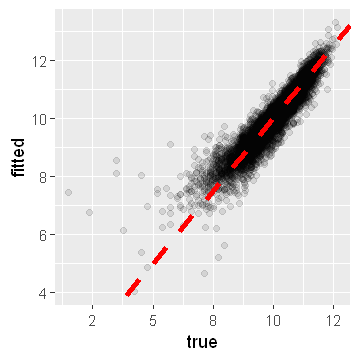

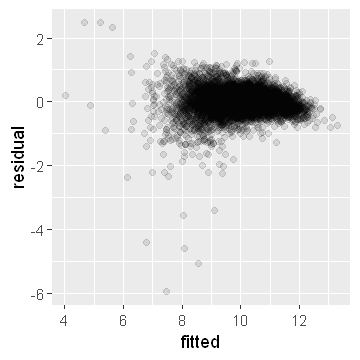

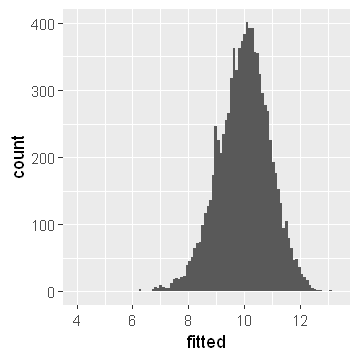

In [37]:
options(repr.plot.width = 3, repr.plot.height = 3)

data = data.frame(true = train_Airquality_lag$log_NO2.GT, fitted = lag_lm_model$fitted.values,residual = lag_lm_model$residuals)
ggplot(data = data, aes(x = true, y = fitted), main = "fitted value v.s. true value") + geom_point(alpha = 0.1) + geom_abline(intercept = 0, slope = 1, color="red", 
                 linetype="dashed", size=1.5)
#plot(train_Airquality$log_NO2.GT.,base_lm_model$fitted.values, main = "fitted value v.s. true value")
ggplot(data = data, aes(x = fitted, y = residual), main = "fitted value v.s. redisual") + geom_point(alpha = 0.1)
ggplot(data = data, aes(x = fitted)) + geom_histogram(bins = 100)
#hist(base_lm_model$residuals, breaks = 100, main = "The histogram of residual")

In [38]:
# check normality
ks.test(lag_lm_model$residuals, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  lag_lm_model$residuals
D = 0.3, p-value <2e-16
alternative hypothesis: two-sided


- 由此看到，如果將log NO2前三期資訊加入不管是MSE、MAE、MRE皆有很明顯的改進
- 由fitted-true圖來看，增加三期資訊後偏離紅色虛線的數量也減少
- 最後檢查並不服從常態分配

In [39]:
MSE <- function(fitted, true) {
    diff = fitted-true
    return(sum((diff)^2))
}
MAE <- function(fitted, true) {
    diff = fitted-true
    return(sum(abs(diff))/length(true))
} 
MRE <- function(fitted, true) {
    diff = fitted-true
    return(sum(abs(diff)/abs(true))/length(true))
}

lag_MSE = MSE(exp(lag_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
base_MSE = MSE(exp(base_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
lag_MAE = MAE(exp(lag_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
base_MAE = MAE(exp(base_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
lag_MRE = MRE(exp(lag_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
base_MRE = MRE(exp(base_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))

criterior <- data.frame("MSE" = c(base_MSE,lag_MSE),"MAE" = c(base_MAE,lag_MAE),"MRE" = c(base_MRE,lag_MRE), row.names = c("base","lag"))
criterior

,MSE,MAE,MRE
base,5e+06,17,0.2
lag,2e+06,11,0.1


- 由上表可看到增加前三期資訊對於預測NO2在MSE、MAE、MRE都是有改進的，因此往後模型前三期的資訊必須考慮進去

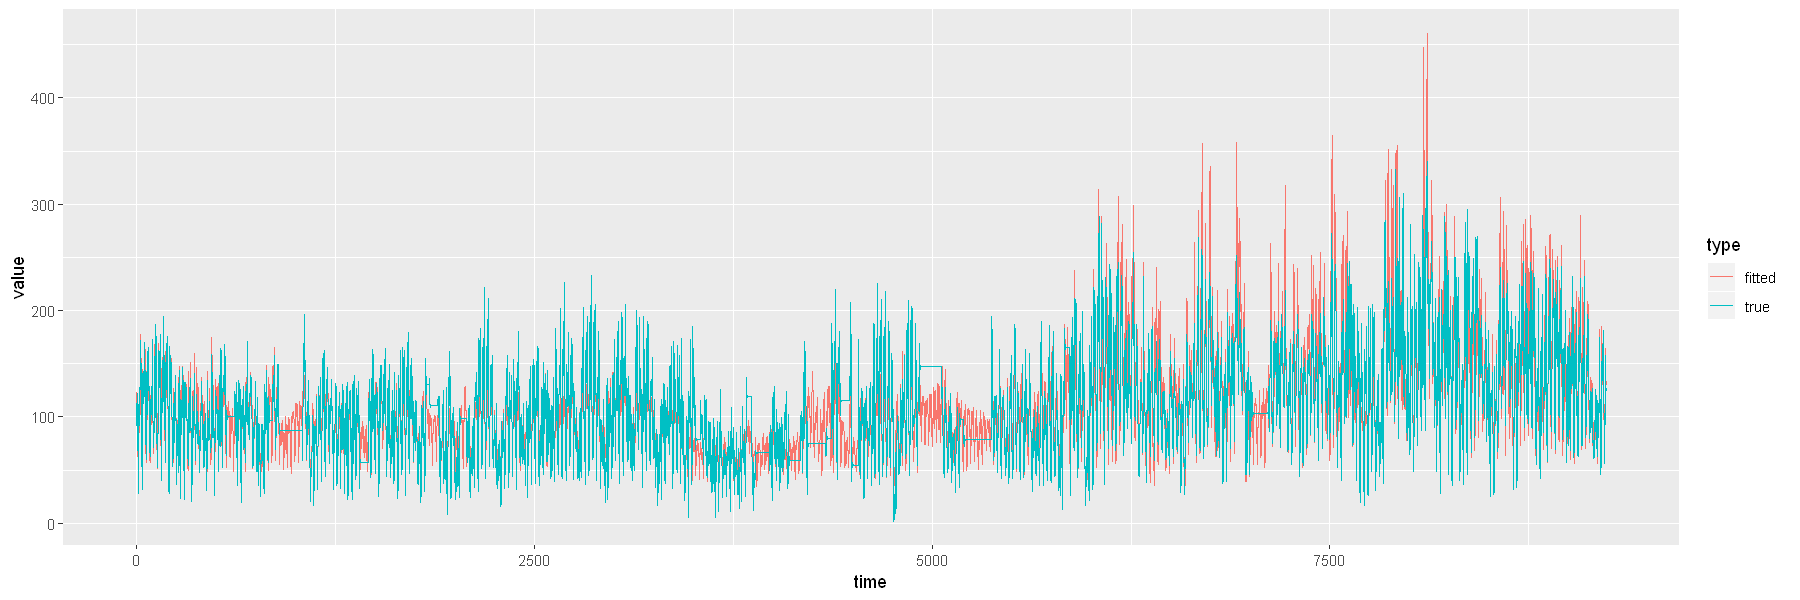

In [40]:
a = data.frame(time = c(1:length(train_Airquality$log_NO2.GT.)),fitted = exp(base_lm_model$fitted.values*log_NO2_sd),true = exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
b = gather(a,value = "value",key = "type", -time)
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(data=b, aes(x= time, y = value, group = type, colour = type)) + geom_line()
#library(dygraphs)
#dygraph(a, main = "") %>% 
#  dyRangeSelector()

## 3. James-Stein model

James-Stein estimator 為一種貝氏方法，由James與Stein於1961提出，此估計量能夠得到較小的風險
Shrinkage estimator:
$$\hat\beta - \dfrac{(p-2)\hat\sigma^2}{\|(\hat\beta -c)X^TX\|^2}(\hat\beta - c)X^2X$$

其中c為任意值，若c用 $\bar\beta$取代，則p-2要改成p-3
$$ X : n \times p$$
$$ \bar\beta : p^{-1}\Sigma_{i=1}^{p}\beta_i$$
$$ J_p = (1,1,....,1)^T p \space vector$$
$$ \hat\sigma^2 = SSResidual/(n-p+2)$$

In [41]:
library(sjmisc) # to_dummy function


Attaching package: 'sjmisc'

The following object is masked from 'package:tidyr':

    replace_na



In [42]:
# factor to dummies
base_hour = select(to_dummy(train_Airquality$hour,suffix="label"), -hour_1)
base_month = select(to_dummy(train_Airquality$month,suffix="label"), -month_1)
base_weekdays = select(to_dummy(train_Airquality$weekdays,suffix="label"), -weekdays_1)

In [43]:
base_beta = as.matrix(base_lm_model$coefficients)
base_X = cbind(1,select(train_Airquality, -NO2.GT.,-PT08.S4.NO2., -log_NO2.GT.,-hour, -weekdays,-month,-AH,-RH),
               train_Airquality$AH,train_Airquality$RH,base_hour,base_weekdays,base_month)
base_sigma = sum((base_lm_model$residuals)^2)/(nrow(base_X)-ncol(base_X) +2)

In [44]:
ShrinkageEstimate <- function(beta,X, sigma,bar) {
    p = ncol(X)
    m = t(beta-bar) %*% t(X) %*% X
    return(t(beta)-(p-3)*sigma/sum((m)^2)*m)
}

In [45]:
base_Shrinkage_beta = ShrinkageEstimate(beta = base_beta, X = as.matrix(base_X), sigma = base_sigma,bar = mean(base_beta))
base_Shrinkage_beta
t(base_beta)

(Intercept),CO.GT.,PT08.S1.CO.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,PT08.S5.O3.,T,AH,⋯,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
9,0.2,8e-05,-0.1,0.003,0.001,-9e-04,2e-04,0.004,-0.7,,0.06,-0.2,-0.1,-0.05,0.05,-0.3,-0.2,-0.3,-0.2,-0.1


(Intercept),CO.GT.,PT08.S1.CO.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,PT08.S5.O3.,T,AH,⋯,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
9,0.2,8e-05,-0.1,0.003,0.001,-9e-04,2e-04,0.004,-0.7,,0.06,-0.2,-0.1,-0.05,0.05,-0.3,-0.2,-0.3,-0.2,-0.1


由上看到，base model 的回歸參數經過此Shrinkage後並沒有太大的改變，僅有小數點後11的差別，之後會再來看看由此得到的參數估計用於預測上是否有改進。

In [46]:
# factor to dummies
lag_hour = select(to_dummy(train_Airquality_lag$hour,suffix="label"), -hour_1)
lag_month = select(to_dummy(train_Airquality_lag$month,suffix="label"), -month_1)
lag_weekdays = select(to_dummy(train_Airquality_lag$weekdays,suffix="label"), -weekdays_1)

In [47]:
lag_beta = as.matrix(lag_lm_model$coefficients)
lag_X = cbind(1,train_Airquality_lag$log_NO2_lag1,train_Airquality_lag$log_NO2_lag2,train_Airquality_lag$log_NO2_lag3,
              select(train_Airquality_lag, -NO2.GT.,-PT08.S4.NO2., -log_NO2.GT.,-hour, -weekdays,-month,-AH,-RH,-log_NO2_lag1,-log_NO2_lag2,-log_NO2_lag3),
              train_Airquality_lag$AH,train_Airquality_lag$RH,lag_hour,lag_weekdays,lag_month)
lag_sigma = sum((lag_lm_model$residuals)^2)/(nrow(lag_X)-ncol(lag_X) +2)

In [48]:
lag_Shrinkage_beta = ShrinkageEstimate(beta = lag_beta, X = as.matrix(lag_X), sigma = lag_sigma,bar = mean(lag_beta))
lag_Shrinkage_beta
t(lag_beta)

(Intercept),log_NO2_lag1,log_NO2_lag2,log_NO2_lag3,CO.GT.,PT08.S1.CO.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,⋯,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
3,0.6,0.009,-0.004,0.06,4e-04,-0.07,0.002,9e-04,-3e-04,,0.03,-0.001,0.03,0.1,0.2,0.07,0.004,-0.05,-0.08,-0.04


(Intercept),log_NO2_lag1,log_NO2_lag2,log_NO2_lag3,CO.GT.,PT08.S1.CO.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,⋯,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
3,0.6,0.009,-0.004,0.06,4e-04,-0.07,0.002,9e-04,-3e-04,,0.03,-0.001,0.03,0.1,0.2,0.07,0.004,-0.05,-0.08,-0.04


由上看到，lag model 的回歸參數經過此Shrinkage後也並沒有太大的改變，僅有小數點後11的差別，之後會再來看看由此得到的參數估計用於預測上是否有改進。

In [49]:
p = (base_Shrinkage_beta)  %*% t(base_X)
q = (lag_Shrinkage_beta)  %*% t(lag_X)

# MSE
base_MSE = MSE(exp(base_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
lag_MSE = MSE(exp(lag_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
JS_MSE = MSE(exp(p*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
JS_lag_MSE = MSE(exp(q*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))

# MAE
lag_MAE = MAE(exp(lag_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
base_MAE = MAE(exp(base_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MAE = MAE(exp(p*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
JS_lag_MAE = MAE(exp(q*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))

# MRE
lag_MRE = MRE(exp(lag_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
base_MRE = MRE(exp(base_lm_model$fitted.values*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MRE = MRE(exp(p*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
JS_lag_MRE = MRE(exp(q*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))

options(digits = 10)
criterior <- data.frame("MSE" = c(base_MSE,lag_MSE,JS_MSE,JS_lag_MSE),"MAE" = c(base_MAE,lag_MAE,JS_MAE,JS_lag_MAE),
                        "MRE" = c(base_MRE,lag_MRE,JS_MRE,JS_lag_MRE), 
                        row.names = c("base","lag","base James-Stein","lag James-Stein"))
criterior

,MSE,MAE,MRE
base,5152157.315,17.09681778,0.1788983492
lag,2177983.335,11.09771967,0.1175484100
base James-Stein,5152162.657,17.09682322,0.1788984995
lag James-Stein,2177984.919,11.09772383,0.1175485067


由上表看到，經過Shrinkage後的參數用於預測上，不僅沒有改進，反而退步了，因此來考慮其他可以修改調整的部分，此處我們已調整c的大小，透過嘗試c在不同尺度下對於預測能力的表現如何

In [50]:
# find the best c 

base_criterior <- data.frame("MSE" = c(base_MSE), "MAE" = c(base_MAE), "MRE" = c(base_MRE))

for (i in 1:10) {
    base_Shrinkage_beta = ShrinkageEstimate(beta = base_beta, X = as.matrix(base_X), sigma = base_sigma,bar = 10^(-i))

    p = (base_Shrinkage_beta)  %*% t(base_X)

    JS_MSE = MSE(exp(p*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
    JS_MAE = MAE(exp(p*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
    JS_MRE = MRE(exp(p*log_NO2_sd), exp(train_Airquality$log_NO2.GT.*log_NO2_sd))
     
    base_criterior[i+1,"MSE"] = JS_MSE
    base_criterior[i+1,"MAE"] = JS_MAE
    base_criterior[i+1,"MRE"] = JS_MRE
    
}
base_criterior


lag_criterior <- data.frame("MSE" = c(lag_MSE), "MAE" = c(lag_MAE), "MRE" = c(lag_MRE))

for (i in 1:10) {
    lag_Shrinkage_beta = ShrinkageEstimate(beta = lag_beta, X = as.matrix(lag_X), sigma = lag_sigma,bar = 10^(-i))

    p = (lag_Shrinkage_beta)  %*% t(lag_X)

    JS_MSE = MSE(exp(p*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
    JS_MAE = MAE(exp(p*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
    JS_MRE = MRE(exp(p*log_NO2_sd), exp(train_Airquality_lag$log_NO2.GT.*log_NO2_sd))
     
    lag_criterior[i+1,"MSE"] = JS_MSE
    lag_criterior[i+1,"MAE"] = JS_MAE
    lag_criterior[i+1,"MRE"] = JS_MRE
    
}
lag_criterior

MSE,MAE,MRE
5152157.315,17.09681778,0.1788983492
5152165.285,17.09682589,0.1788985735
5152258.801,17.09692101,0.1789011923
5151573.460,17.09623161,0.1788814911
5151808.534,17.09646515,0.1788883804
5151822.042,17.09647863,0.1788887717
5151823.335,17.09647992,0.1788888091
5151823.464,17.09648005,0.1788888129
5151823.477,17.09648006,0.1788888132
5151823.478,17.09648006,0.1788888133


MSE,MAE,MRE
2177983.335,11.09771967,0.1175484100
2177984.753,11.09772339,0.1175484966
2178001.380,11.09776715,0.1175495078
2177878.748,11.09744385,0.1175418225
2177921.008,11.09755594,0.1175445377
2177923.431,11.09756233,0.1175446910
2177923.663,11.09756294,0.1175447056
2177923.686,11.09756300,0.1175447071
2177923.688,11.09756301,0.1175447072
2177923.688,11.09756301,0.1175447072



由上表看到，在c為$10^3$~$10^{10}$間，base model 與 lag model在MSE、MAE、MRE皆有小小的改進，因此我們以此模型拿來預測後續的test set

# Test set accuracy

In [66]:
# base model 
options(digits = 20)
test_Airquality <- slice(Airquality, 9238:9357)
test_Airquality$log_NO2.GT. <- log(test_Airquality$NO2.GT.)
log_NO2_sd <- (train_Airquality$log_NO2.GT. %>% sd())
test_Airquality$log_NO2.GT. <- (test_Airquality$log_NO2.GT.)/log_NO2_sd
base_hour = select(to_dummy(Airquality$hour,suffix="label"), -hour_1)[9238:9357,]
base_month = select(to_dummy(Airquality$month,suffix="label"), -month_1)[9238:9357,]
base_weekdays = select(to_dummy(Airquality$weekdays,suffix="label"), -weekdays_1)[9238:9357,]

base_X = cbind(1,select(test_Airquality, -NO2.GT.,-PT08.S4.NO2., -log_NO2.GT.,-hour, -weekdays,-month,-AH,-RH),
               test_Airquality$AH,test_Airquality$RH,base_hour,base_weekdays,base_month)

p = (base_lm_model$coefficients) %*% t(base_X)
q = base_Shrinkage_beta %*% t(base_X)
base_MSE = MSE(exp(p*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
base_MAE = MAE(exp(p*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
base_MRE = MRE(exp(p*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
base_MSE
base_MAE
base_MRE

JS_MSE = MSE(exp(q*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MAE = MAE(exp(q*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MRE = MRE(exp(q*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MSE
JS_MAE
JS_MRE


[1] 120033461599.92099

[1] 24979.263043070361

[1] 205.60636108893689

[1] 120001059387.82578

[1] 24976.254348862953

[1] 205.58284638556148

In [75]:
# lag model
log_NO2_sd <- (train_Airquality$log_NO2.GT. %>% sd())
test_Airquality_lag <- data.frame(log_NO2_lag1 = log(Airquality[9237:9356,"NO2.GT."]/log_NO2_sd),
                                   log_NO2_lag2 = log(Airquality[9236:9355,"NO2.GT."]/log_NO2_sd),
                                   log_NO2_lag3 = log(Airquality[9235:9354,"NO2.GT."]/log_NO2_sd),Airquality[9238:9357,])
lag_hour = select(to_dummy(Airquality$hour,suffix="label"), -hour_1)[9238:9357,]
lag_month = select(to_dummy(Airquality$month,suffix="label"), -month_1)[9238:9357,]
lag_weekdays = select(to_dummy(Airquality$weekdays,suffix="label"), -weekdays_1)[9238:9357,]

lag_X = cbind(1,select(test_Airquality_lag, -NO2.GT.,-PT08.S4.NO2.,-hour, -weekdays,-month,-AH,-RH),
               test_Airquality$AH,test_Airquality$RH,lag_hour,lag_weekdays,lag_month)

p = (lag_lm_model$coefficients) %*% t(lag_X)
q = lag_Shrinkage_beta %*% t(lag_X)
base_MSE = MSE(exp(p*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
base_MAE = MAE(exp(p*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
base_MRE = MRE(exp(p*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
base_MSE
base_MAE
base_MRE

JS_MSE = MSE(exp(q*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MAE = MAE(exp(q*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MRE = MRE(exp(q*log_NO2_sd), exp(test_Airquality$log_NO2.GT.*log_NO2_sd))
JS_MSE
JS_MAE
JS_MRE

[1] 75683421.965425923

[1] 691.23060755539302

[1] 5.9483218333006116

[1] 75671815.124458537

[1] 691.18117267190985

[1] 5.9479139920692363

# 結論

1. 由上面看到在test set上，lag model 比base model 的MSE、MAE、MRE改進許多
2. James-Stein 模型皆有稍微改進base model 與 lag model 
3. 目前看到其實預測值跟真實點有很大的差距，但此問題並沒有發生在train set上，可能的懷疑是此模型過度配適，因為時間不足來不及仔細檢驗是否為城市邏輯錯誤，唯後續待時更改。